# Homework 7
You are waiting on some datasets from different teams but the approval process may take some time.

You have no intention to wait! You will generate some fake data to get started.

Here are some info you expect from the management:

 - Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only)
 - Salary dataset contains employee id, department id, yearly salary
 - Department dataset contains department id, department name (5-10 departments)

Here are the questions expected to be answered:

1. Visualize the average salary of each department
2. Visualize the total number of employees living in each state for each department
3. Visualize salary distribution of different states
4. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:`

Try to make dataframes realistic.

 - Salary distribution as normal distribution
 - Salary of different states can be higher for 5-10K compared to other states

In [226]:
pip install faker 


Note: you may need to restart the kernel to use updated packages.


### Importing libraries

In [7]:
from faker import Faker
import pandas as pd
import numpy as np
from random import randint
import random
import seaborn as sns
from matplotlib import pyplot as plt

### Create Employee Dataset

In [8]:
fake = Faker()
#Create Employee dataset
East_Coast = ['Connecticut', 'Delaware', 'Florida', 'Georgia','Maine','Maryland','Massachusetts','New Hampshire',
              'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island','South Carolina','Virginia']
f_Employees = [{'employeeid': i,
                'name': fake.first_name(),
                'lastname' : fake.last_name(),
                'phone': fake.phone_number(),
                'state': random.choice(East_Coast)} for i in range (7000)]
#print(f_Employees)
#type(f_Employees)
df_Employees = pd.DataFrame(f_Employees)
df_Employees

,employeeid,name,lastname,phone,state
0,0,Jeffrey,Gardner,637-658-6825,Georgia
1,1,Kenneth,Smith,533.419.6339x7695,Pennsylvania
2,2,Kyle,Fuller,5594694305,Virginia
3,3,Diamond,Cardenas,454.663.5920,New Jersey
4,4,Michael,Daniel,001-417-745-6597,Delaware
...,...,...,...,...,...
6995,6995,Rose,Burke,001-678-890-4565,Maine
6996,6996,Joshua,Cruz,001-690-316-8106,Maryland
6997,6997,Robert,Ross,413-540-6610x617,Connecticut
6998,6998,Corey,Beard,+1-982-975-4784,Maryland


### Create Salary Dataset

In [9]:
#Create Salary Dataset
f_Salary = [{'employeeid': i, 
             'departmentid' : random.randint(0, 6), 
             'yearlysalary': randint(5000,50000)} for i in range (2000)]
#print(f_Employees)
df_Salary = pd.DataFrame(f_Salary)
df_Salary

,employeeid,departmentid,yearlysalary
0,0,3,19043
1,1,5,31817
2,2,0,10064
3,3,1,22052
4,4,2,38855
...,...,...,...
1995,1995,1,30215
1996,1996,5,32559
1997,1997,0,28112
1998,1998,4,8674


### Create Department Dataset


In [10]:

df_Department = pd.DataFrame({'departmentid':[0, 1, 2, 3, 4, 5, 6],
                             'departmentname':['Information Technology', 'Sales and Marketing', 'Accounting and Finance', 'Human Resource', 'Research and Development', 'Administration', 'Public Relations' ]})
df_Department




,departmentid,departmentname
0,0,Information Technology
1,1,Sales and Marketing
2,2,Accounting and Finance
3,3,Human Resource
4,4,Research and Development
5,5,Administration
6,6,Public Relations


## VISUAL ANALYSIS

### Average Salary for each Department

In [20]:
#Department Average Salary 
avg_salary = df_Salary.merge(df_Department, on = 'departmentid')
avg_salary = avg_salary.groupby('departmentname').agg(average_salary = ('yearlysalary', 'mean')).sort_values( by = 'average_salary', ascending=True)
avg_salary



,average_salary
departmentname,
Research and Development,26690.025455
Sales and Marketing,27674.719512
Human Resource,27857.892508
Information Technology,27896.707317
Accounting and Finance,28026.797710
Public Relations,29120.238754
Administration,29273.003968


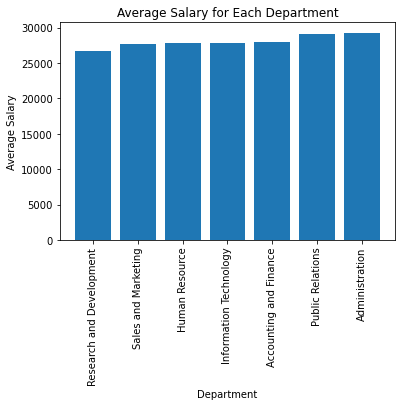

In [35]:
plt.bar(x = avg_salary.index, height = avg_salary.average_salary)
plt.xticks(rotation=90)
plt.title("Average Salary for Each Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


### Total Count of Employees in each state for each department

In [23]:
#Visualize the total number of employees living in each state for each department
employee_salary = pd.merge(df_Employees, df_Salary, left_on="employeeid", right_on="employeeid", how='left')
get_Department_names = pd.merge(employee_salary, df_Department, left_on="departmentid", right_on="departmentid", how='left')
get_Department_names1 = get_Department_names.groupby(['departmentname', 'state']).employeeid.count()
get_Department_names1

departmentname          state         
Accounting and Finance  Connecticut       22
                        Delaware          22
                        Florida           17
                        Georgia           21
                        Maine             22
                                          ..
Sales and Marketing     North Carolina    17
                        Pennsylvania      27
                        Rhode Island      23
                        South Carolina    22
                        Virginia          22
Name: employeeid, Length: 105, dtype: int64

In [26]:
#Confirming the values obtained in the above grouping
x = get_Department_names[(get_Department_names['state'] == 'Connecticut') & (get_Department_names['departmentname'] == 'Accounting and Finance')]
len(x)

22

In [27]:
change = get_Department_names1.loc[:].reset_index().pivot(index='departmentname', columns='state', values='employeeid')
change.fillna(0, inplace = True)
change



state,Connecticut,Delaware,Florida,Georgia,Maine,Maryland,Massachusetts,New Hampshire,New Jersey,New York,North Carolina,Pennsylvania,Rhode Island,South Carolina,Virginia
departmentname,,,,,,,,,,,,,,,
Accounting and Finance,22,22,17,21,22,16,20,16,17,14,21,15,9,16,14
Administration,14,18,18,11,21,18,14,21,22,15,19,20,14,14,13
Human Resource,23,19,15,26,23,16,28,21,20,19,19,16,23,24,15
Information Technology,17,15,17,16,20,21,23,19,21,11,23,23,26,14,21
Public Relations,20,16,18,22,21,16,16,16,24,20,25,15,14,22,24
Research and Development,19,25,11,14,26,11,17,16,18,26,19,22,14,20,17
Sales and Marketing,29,20,12,22,19,23,27,18,21,26,17,27,23,22,22


[Text(0.5, 1.0, 'total number of employees living in each state for each department')]

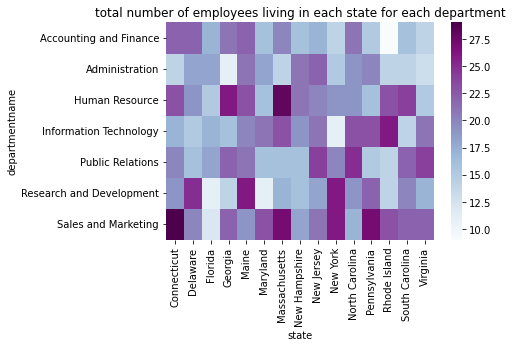

In [28]:
sns.heatmap(change, cmap="BuPu").set(title = 'total number of employees living in each state for each department')

### Salary Distribution of Each State

In [247]:
#Visualize salary distribution of different states
employee_salary

,employeeid,name,lastname,phone,state,departmentid,yearlysalary
0,0,Rose,Parker,001-827-634-4001,Delaware,1.0,44592.0
1,1,Hannah,Zamora,001-185-986-1652x23996,Massachusetts,2.0,9297.0
2,2,Michael,Evans,+1-046-731-9529,Virginia,5.0,43948.0
3,3,Eric,Gonzalez,6933362996,Massachusetts,6.0,35945.0
4,4,Debbie,Rodgers,(411)857-2432,Georgia,2.0,38959.0
...,...,...,...,...,...,...,...
6995,6995,Victoria,Hunter,5335239491,Maryland,NaN,NaN
6996,6996,Belinda,Gray,+1-256-071-9876x43207,Connecticut,NaN,NaN
6997,6997,Kelly,Green,407.683.0210,South Carolina,NaN,NaN
6998,6998,Arthur,Lewis,121.470.9558,New Jersey,NaN,NaN


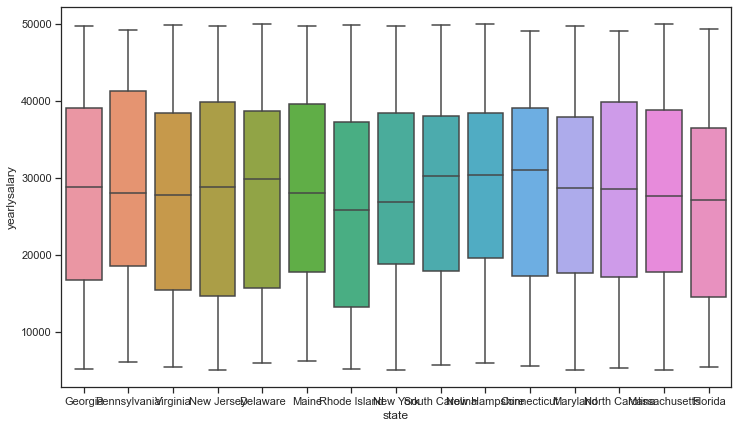

In [40]:
sns.set(rc={"figure.figsize":(12, 7)}) #width=12, #height=7
sns.set_style('ticks')

plot = sns.boxplot(y = 'yearlysalary', x = 'state', data = employee_salary )

In [38]:
#employee_yearlysalary = employee_salary.groupby('state').yearlysalary.mean().sort_values(ascending=True)
#plt.bar(x = employee_yearlysalary.index, height = employee_yearlysalary.values)
#plt.xticks(rotation=90)
#plt.title("")
#plt.xlabel("State")
#plt.ylabel("Salary")
#plt.show()

### Salary Distribution for Each Department

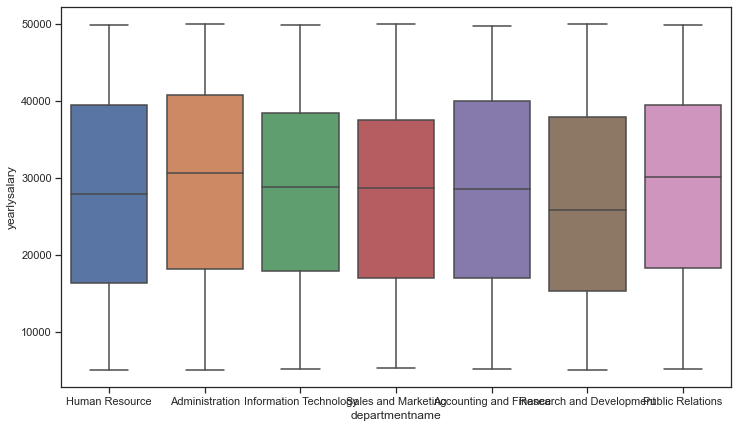

In [39]:
#Visualize salary distribution of different departments
get_department_salary = pd.merge(df_Salary, df_Department)
get_department_salary
# plt.scatter(data = get_department_salary, x = 'departmentname', y = 'yearlysalary')
# plt.xticks(rotation=90)


sns.set(rc={"figure.figsize":(12, 7)}) #width=12, #height=7
sns.set_style('ticks')

plot = sns.boxplot(y = 'yearlysalary', x = 'departmentname', data = get_department_salary )